In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
kc_df = pd.DataFrame()

In [3]:
kc_df = pd.read_csv('https://raw.githubusercontent.com/javed24/House-Sales-Prediction/master/dataset/kc_house_data.csv')


In [4]:
print(kc_df.shape)

(21613, 21)
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  

[2 rows x 21 columns]


In [5]:
list(kc_df.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built']
#features = list(kc_df.columns.values)

In [7]:
feature_matrix = kc_df[features]
lable_vector = kc_df['price']
feature_matrix.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


In [8]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, lable_vector, test_size=0.3, random_state=3)

In [9]:
# Initialize classifiers 
#my_logreg = LogisticRegression()

my_linear = LinearRegression()

#my_decisiontree = DecisionTreeClassifier()

#k = 5
#knn = KNeighborsClassifier(n_neighbors=k)

In [10]:
#knn.fit(X_train, y_train)

#my_decisiontree.fit(X_train, y_train)

#my_logreg.fit(X_train, y_train)

my_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# printing Theta0 using attribute "intercept_":
print(my_linear.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linear.coef_)
coef_list = my_linear.coef_
# coef_list.sort()
print(coef_list)

6461472.20531
[ -3.63453263e+04   4.59850421e+04   1.12835313e+02  -2.27124562e-01
   2.81322640e+04   5.29438621e+05   4.93081587e+04   1.81986059e+04
   1.23643988e+05   5.61046684e+01   5.67306448e+01  -3.70924829e+03]
[ -3.63453263e+04   4.59850421e+04   1.12835313e+02  -2.27124562e-01
   2.81322640e+04   5.29438621e+05   4.93081587e+04   1.81986059e+04
   1.23643988e+05   5.61046684e+01   5.67306448e+01  -3.70924829e+03]


In [12]:
feature_dict = dict(zip(features, coef_list))
print(feature_dict)
import operator
sorted_d = sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True)
print('Dictionary in descending order by value : ',sorted_d)

{'bedrooms': -36345.326302930967, 'bathrooms': 45985.042077590108, 'sqft_living': 112.83531323383281, 'sqft_lot': -0.22712456233651324, 'floors': 28132.263967059673, 'waterfront': 529438.62057369074, 'view': 49308.158704706584, 'condition': 18198.605870255516, 'grade': 123643.98836587249, 'sqft_above': 56.104668441810645, 'sqft_basement': 56.730644823430339, 'yr_built': -3709.2482901308686}
Dictionary in descending order by value :  [('waterfront', 529438.62057369074), ('grade', 123643.98836587249), ('view', 49308.158704706584), ('bathrooms', 45985.042077590108), ('floors', 28132.263967059673), ('condition', 18198.605870255516), ('sqft_living', 112.83531323383281), ('sqft_basement', 56.730644823430339), ('sqft_above', 56.104668441810645), ('sqft_lot', -0.22712456233651324), ('yr_built', -3709.2482901308686), ('bedrooms', -36345.326302930967)]


In [13]:
#sorted_features = ['waterfront', 'grade', 'view', 'bathrooms', 'floors', 'condition']
sorted_features = ['sqft_living','sqft_basement','sqft_above','sqft_lot','yr_built','bedrooms']
best_feature_matrix = kc_df[sorted_features]
best_feature_matrix = preprocessing.scale(best_feature_matrix)
#best_feature_matrix.head()

X_train, X_test, y_train, y_test = train_test_split(best_feature_matrix, lable_vector, test_size=0.3, random_state=3)
my_linear.fit(X_train, y_train)
y_predict_ln = my_linear.predict(X_test)
print(y_predict_ln)

[  373998.66022209  1315694.66022209   815982.66022209 ...,
   183406.66022209   521838.66022209   281710.66022209]


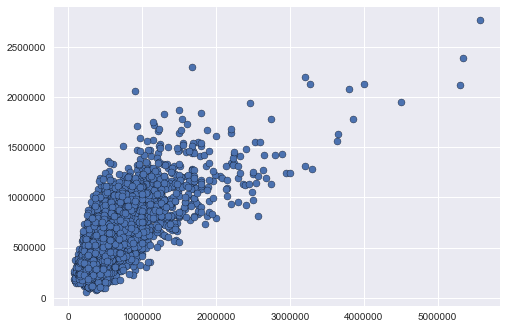

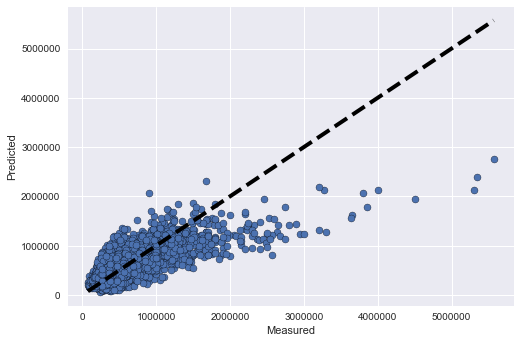

[  373998.66022209  1315694.66022209   815982.66022209 ...,
   183406.66022209   521838.66022209   281710.66022209]


In [15]:
#predict testing data

#y_predict_knn = knn.predict(X_test)

#y_predict_dt = my_decisiontree.predict(X_test)

#y_predict_lr = my_logreg.predict(X_test)
y_predict_ln = my_linear.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print(y_predict_ln)
#print(y_predict_lr)
#print(y_predict_dt)
#print(y_predict_knn)

In [ ]:
# from sklearn.metrics import accuracy_score

# score_lr = accuracy_score(y_test, y_predict_lr.argmax(axis=1))
# #score_dt = accuracy_score(y_test, y_predict_dt)
# #score_knn = accuracy_score(y_test, y_predict_knn)
# print("Logistic Regression:>>> ",score_lr)
# #print("Decision Tree>> ",score_dt)
# #print("KNN>>>> ",score_knn)

In [ ]:
error = mean_squared_error(y_test, y_predict_ln)
print(error)

In [ ]:
root_mean_square_error = np.sqrt(error)
print(root_mean_square_error)

In [ ]:
kv_linear_reg = LinearRegression()
new_feature_marrix = preprocessing.scale(feature_matrix)
kv_mse = cross_val_score(kv_linear_reg,new_feature_marrix,lable_vector, cv=10, scoring='neg_mean_squared_error')

#print(credit_mse)

credit_mse_positive = -kv_mse

credit_rmse = np.sqrt(credit_mse_positive)

#print(credit_rmse)

print(credit_rmse.mean())

In [ ]:
for feature in feature_matrix:
    plt.plot(kc_df[feature], kc_df['price'])
    red_patch = mpatches.Patch(color='red', label= feature)
    plt.legend(handles=[red_patch])
    plt.show()

In [ ]:
my_RandomForest = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train) #train random forest classifier using training data
y_predict_rf=my_RandomForest.predict(X_test) #predict using testing data
score_rf=accuracy_score(y_test, y_predict_rf) #accuracy based on predicted values and original values
print("Random Forest> ",score_rf)

In [21]:
kc_df['year_sell'] = [int(i[:4]) for i in kc_df.date]

kc_df.year_sell.value_counts().sort_index()


test=kc_df[kc_df.year_sell==2015].reset_index(drop=True )
train=kc_df[kc_df.year_sell==2014].reset_index(drop=True )
x=train[kc_df.columns.drop(['price','id','date'])]
y=train['price']
col=kc_df.columns.drop(['price','id','date'])
clf = LinearRegression()
clf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
clf.score(x,y)

0.70720633808996691